In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [25]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

#1. Data Exploration

In [26]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",NaN,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9547 non-null   object 
 4   Address               9548 non-null   object 
 5   Locality              9546 non-null   object 
 6   Locality Verbose      9544 non-null   object 
 7   Longitude             9548 non-null   float64
 8   Latitude              9546 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9550 non-null   float64
 11  Currency              9545 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9550 non-null   object 
 14  Is delivering now     9546 non-null   object 
 15  Switch to order menu 

In [28]:
#->Insight
#  1. Has Table Booking, Is Delivering now, Switch to order menu = Could be Numeric also

In [29]:
#DATA EXPLORATION

In [30]:
#OUR Target Variable(Y) is Aggregate Ratings

####Step 2: Checking Attributes

In [31]:
df.shape

(9551, 21)

In [32]:
df.columns.values

array(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'], dtype=object)

In [33]:
df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [34]:
#->Insight
#  2. Locality, Restaurant ID, Longitude, Latitude is useless.

In [23]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9548.000000,9546.000000,9550.000000,9545.000000,9549.000000,9550.000000
mean,9.051128e+06,18.365616,64.122462,25.848050,1199.168796,1.804295,2.666101,156.893822
std,8.791521e+06,56.750546,41.472923,11.005570,16122.026659,0.905558,1.516422,430.188853
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081314,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570450,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282001,28.642747,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


####Step 3: Analysing Target Variable

In [36]:
#Count
df['Aggregate rating'].value_counts()

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,498
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


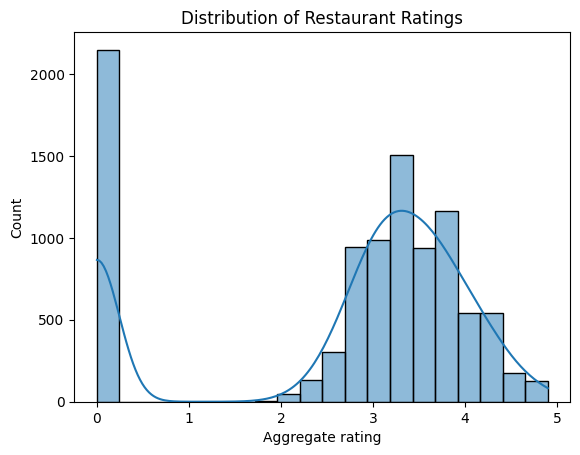

In [37]:
#Binned Graph
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.show()

####Step 4: Checking Null Values

In [38]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9547 non-null   object 
 4   Address               9548 non-null   object 
 5   Locality              9546 non-null   object 
 6   Locality Verbose      9544 non-null   object 
 7   Longitude             9548 non-null   float64
 8   Latitude              9546 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9550 non-null   float64
 11  Currency              9545 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9550 non-null   object 
 14  Is delivering now     9546 non-null   object 
 15  Switch to order menu 

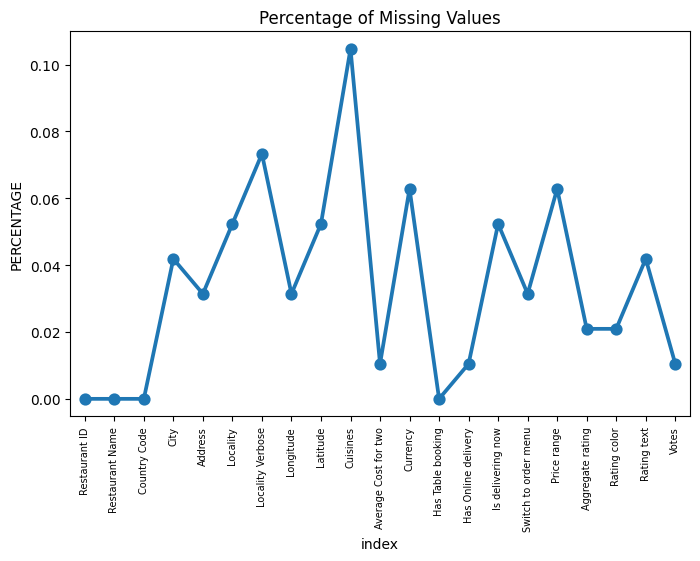

In [39]:
#Visualisation of missing data values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(8, 5))
ax = sns.pointplot(x="index", y=0, data=missing)
plt.xticks(rotation =90, fontsize =7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [40]:
#Manual Values of missing data
missing = df.isnull().sum()
percent = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage': percent})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # only columns with missing values
missing_data.sort_values(by='Percentage', ascending=False, inplace=True)

print(missing_data)

                      Missing Values  Percentage
Cuisines                          10    0.104701
Locality Verbose                   7    0.073291
Currency                           6    0.062821
Price range                        6    0.062821
Latitude                           5    0.052351
Is delivering now                  5    0.052351
Locality                           5    0.052351
City                               4    0.041880
Rating text                        4    0.041880
Address                            3    0.031410
Longitude                          3    0.031410
Switch to order menu               3    0.031410
Rating color                       2    0.020940
Aggregate rating                   2    0.020940
Average Cost for two               1    0.010470
Has Online delivery                1    0.010470
Votes                              1    0.010470


In [41]:
#Total Sum of all missing values
missing_percent = (df.isna().sum() / len(df)) * 100
total_missing = missing_percent.sum()
print("Total % of missing values across all columns:", total_missing)

Total % of missing values across all columns: 0.7119673332635326


Insights:
- 3. A lot of Null Values to be cleaned.
- 4. Max %age = 0.1%
- 5. Total %age = 0.7%

####Step 5: Missing Data

In [ ]:
#Since, %age of missing data < 5%, we will drop those rows entirely.

#2. Data Cleaning

####Step 1: New DF

In [42]:
#New DF
new_df=df.copy()

In [48]:
new_df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3.0,4.4,Green,Very Good,336.0


####Step 2: Check Null Values

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9547 non-null   object 
 4   Address               9548 non-null   object 
 5   Locality              9546 non-null   object 
 6   Locality Verbose      9544 non-null   object 
 7   Longitude             9548 non-null   float64
 8   Latitude              9546 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9550 non-null   float64
 11  Currency              9545 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9550 non-null   object 
 14  Is delivering now     9546 non-null   object 
 15  Switch to order menu 

####Step 3: Missing Value Treatment

In [45]:
#Removing missing values
new_df.dropna(how ='any', inplace=True)
# how = 'any' means if any valye in row is null, delete the entire row

In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9493 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9493 non-null   int64  
 1   Restaurant Name       9493 non-null   object 
 2   Country Code          9493 non-null   int64  
 3   City                  9493 non-null   object 
 4   Address               9493 non-null   object 
 5   Locality              9493 non-null   object 
 6   Locality Verbose      9493 non-null   object 
 7   Longitude             9493 non-null   float64
 8   Latitude              9493 non-null   float64
 9   Cuisines              9493 non-null   object 
 10  Average Cost for two  9493 non-null   float64
 11  Currency              9493 non-null   object 
 12  Has Table booking     9493 non-null   object 
 13  Has Online delivery   9493 non-null   object 
 14  Is delivering now     9493 non-null   object 
 15  Switch to order menu  9493

####Step 4: Binning Columns

How to know what to Bin?
*   Intuition
*   If Max is way higher than 75%ile



In [137]:
#Check Aggregate Rating
new_df['Aggregate rating'].describe()

#Intuition says bin

,Aggregate rating
count,9493.000000
mean,2.659928
std,1.517216
min,0.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000


In [65]:
#1. Binning Ratings
bins = [0, 2.5, 3.5, 4.0, 4.5, 5.0]
labels = ['0.0 - 2.5', '2.6 - 3.5', '3.6 - 4.0', '4.1 - 4.5', '4.6 - 5.0']

new_df['Rating_Bin'] = pd.cut(new_df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)
new_df['Rating_Bin'].value_counts()

,count
Rating_Bin,
2.6 - 3.5,4091
0.0 - 2.5,2442
3.6 - 4.0,1862
4.1 - 4.5,898
4.6 - 5.0,200


In [139]:
#Check Average Cost for Two
new_df['Average Cost for two'].describe()

#Max is way higher than 75%ile

,Average Cost for two
count,9493.000000
mean,1202.849152
std,16170.224244
min,0.000000
25%,250.000000
50%,400.000000
75%,700.000000
max,800000.000000


In [66]:
#2. Binning Average Cost For Two
bins = [0, 500, 1000, 2000, 5000, new_df['Average Cost for two'].max()]
labels = ['0 - 500', '501 - 1000', '1001 - 2000', '2001 - 5000', '5001+']

new_df['Cost_Class'] = pd.cut(new_df['Average Cost for two'], bins=bins, labels=labels, include_lowest=True)
new_df['Cost_Class'].value_counts()

,count
Cost_Class,
0 - 500,6040
501 - 1000,2293
1001 - 2000,903
2001 - 5000,225
5001+,32


In [140]:
#Check Votes
new_df['Votes'].describe()

,Votes
count,9493.000000
mean,155.399031
std,428.843531
min,0.000000
25%,5.000000
50%,30.000000
75%,128.000000
max,10934.000000


In [142]:
#3. Binning Votes
bins = [0, 100, 500, 1000, 5000, new_df['Votes'].max()]
labels = ['0–100', '101–500', '501–1000', '1001–5000', '5000+']
new_df['Votes_bin'] = pd.cut(new_df['Votes'], bins=bins, labels=labels)

#Max is way higher than 75%ile

####Step 5: Converting Country Code to Country


Note: Country Code is to be converted into Country

In [114]:
#Lets check if we have multiple countries
new_df['Country Code'].value_counts()

,count
Country Code,
1,8619
216,425
215,72
214,60
189,60
30,59
148,40
208,29
14,24


This proves there are multiple countries

In [119]:
country_dict = {
    1: 'India',
    216: 'United States',
    215: 'United Kingdom',
    30: 'Brazil',
    189: 'Australia',
    214: 'UAE',
    148: 'Canada',
    208: 'Singapore',
    14: 'Qatar',
    162: 'South Africa',
    94: 'New Zealand',
    166: 'Philippines',
    184: 'Indonesia',
    191: 'Sri Lanka',
    37: 'Turkey'
}

new_df['Country'] = new_df['Country Code'].map(country_dict)

In [120]:
new_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0,South Africa
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0,South Africa
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4.0,4.4,Green,Very Good,270.0,South Africa
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0,South Africa
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",NaN,"SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0,South Africa


####Step 6: Remove Unnecessary Columns

In [ ]:
#Remove Columns
cols_to_drop = [
cols_to_drop = [
    'Restaurant ID',       # Just an identifier
    'Address',             # Too granular, messy
    'Locality Verbose',    # Duplicate info
    'Switch to order menu', # Not analytically useful
    'Locality',
    'Longitude',
    'Latitude',
    'Country Code',
    'Rating color',
    'Restaurant Name',
    'Currency'
]
new_df.drop(cols_to_drop, axis=1, inplace=True)
]
new_df.drop(cols_to_drop, axis=1, inplace=True)

In [157]:
new_df.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Rating_Bin,Cost_Class,Country,Votes_bin
0,Makati City,"French, Japanese, Desserts",1100.0,Yes,No,No,3.0,4.8,Excellent,314.0,4.6 - 5.0,1001 - 2000,South Africa,101–500
1,Makati City,Japanese,1200.0,Yes,No,No,3.0,4.5,Excellent,591.0,4.1 - 4.5,1001 - 2000,South Africa,501–1000
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000.0,Yes,No,No,4.0,4.4,Very Good,270.0,4.1 - 4.5,2001 - 5000,South Africa,101–500
3,Mandaluyong City,"Japanese, Sushi",1500.0,No,No,No,4.0,4.9,Excellent,365.0,4.6 - 5.0,1001 - 2000,South Africa,101–500
5,Mandaluyong City,Chinese,1000.0,No,No,No,3.0,4.4,Very Good,336.0,4.1 - 4.5,501 - 1000,South Africa,101–500


#3. Data Analysis

##3.1 Univariate Analysis

In [100]:
sns.set(style='whitegrid')

/tmp/ipython-input-2546480516.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


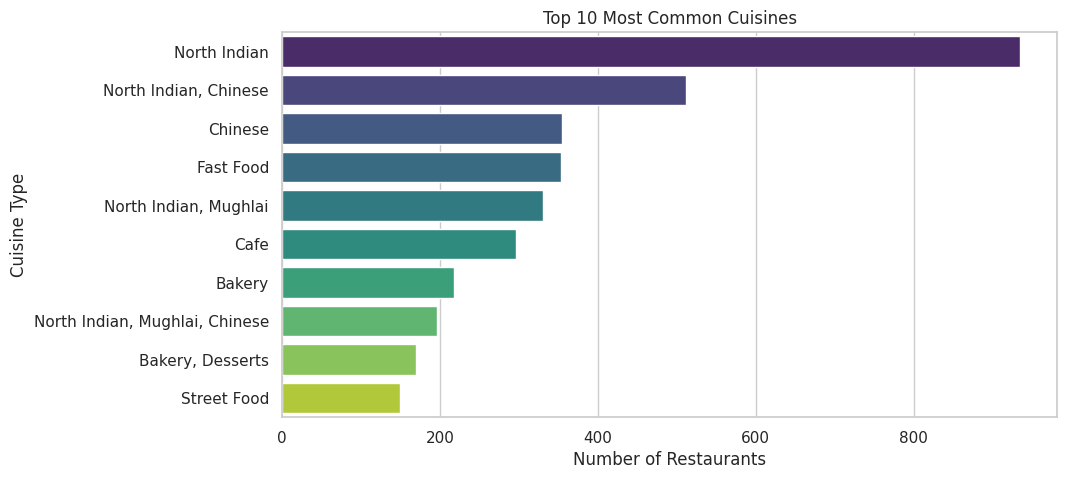

In [104]:
#Univariate Anlaysis for Top 10 Cusines(Since there are a lot of Cuisines)
top_cuisines = new_df['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.show()

Insights:
- 7. North Indian, Chinese, Fast Food, Mughlai, Cafe, Bakery, Desserts, Street Foods are top 10 indian cuisines in restaurants.
- 8. North INidan, CHinese dominate
- 9. Street Food, Bakery, Cafe are lowest of the 10

/tmp/ipython-input-3355732594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='crest')


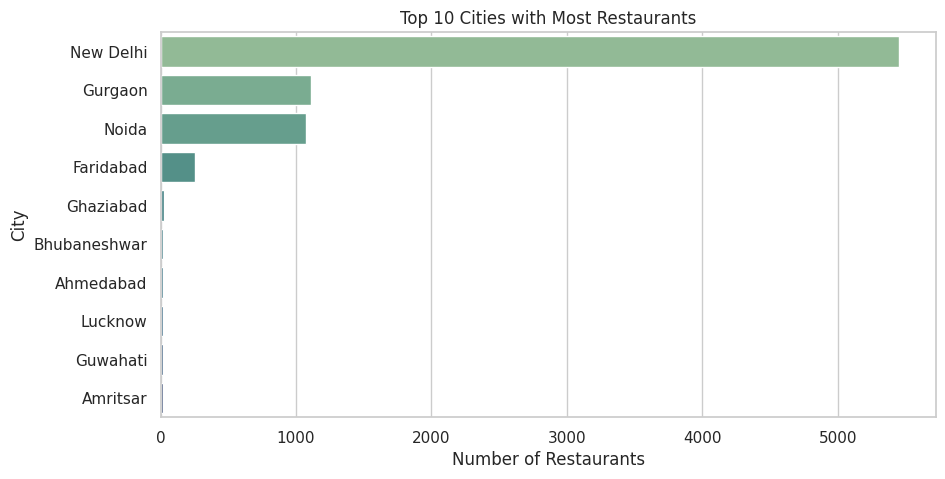

In [106]:
#City — Restaurant concentration
top_cities = new_df['City'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='crest')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

Insights:
- 10. New Delhi has the most number of restaurants.
- 11. New Delhi, Gurgaon, Noida, Fridabad, Ghaziabad are cities that dominate
- 12. Ahmedabad, Lucknow, Guwahati, Amrtitsar are in the top 10.

/tmp/ipython-input-1258165731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='crest')


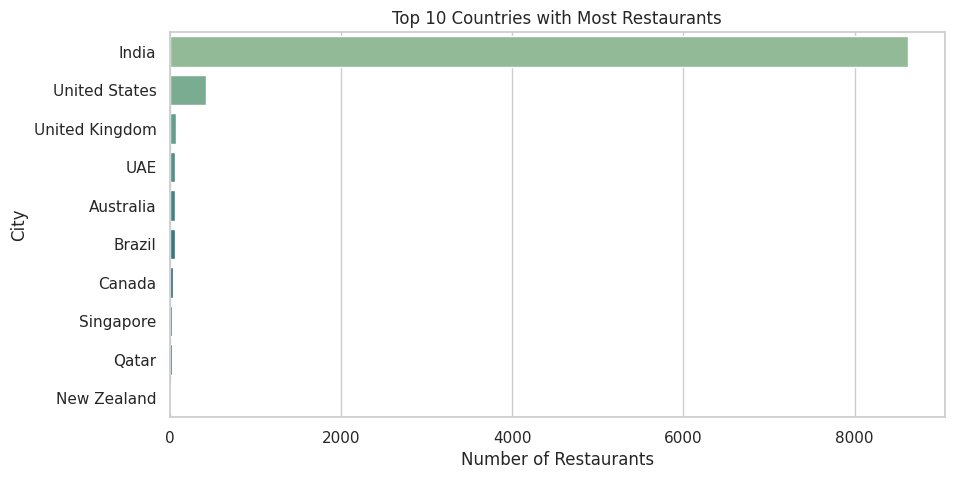

In [124]:
#Country — Restaurant concentration
top_cities = new_df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='crest')
plt.title('Top 10 Countries with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [132]:
#Lets get the percentages
(new_df['Country'].value_counts(normalize=True) * 100)

,proportion
Country,
India,90.793216
United States,4.476983
United Kingdom,0.758454
UAE,0.632045
Australia,0.632045
Brazil,0.621511
Canada,0.421363
Singapore,0.305488
Qatar,0.252818


Insights:
- 13. Most Rests in India by a huge margin(90.7%)
- 14. Least Rests are in Turkey
- 15. US has 4.47% of the restaurants


/tmp/ipython-input-614157860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Rating_Bin', palette='cool')


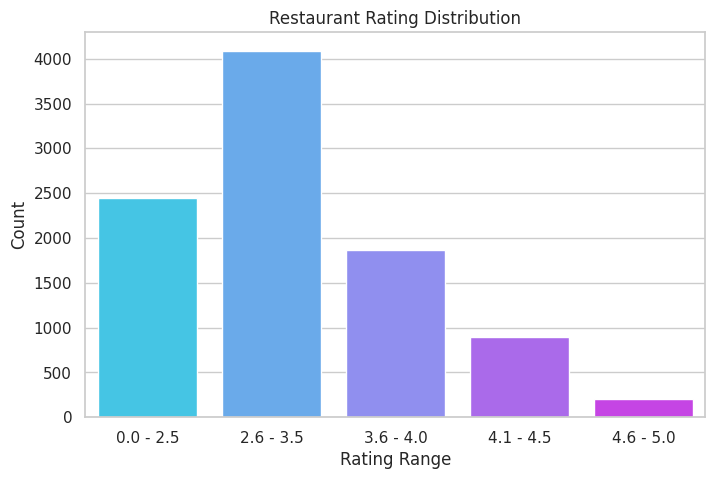

In [108]:
#Ratings — How restaurants are rated
plt.figure(figsize=(8,5))
sns.countplot(data=new_df, x='Rating_Bin', palette='cool')
plt.title('Restaurant Rating Distribution')
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.show()

In [133]:
#Lets get the percentages
(new_df['Rating_Bin'].value_counts(normalize=True) * 100)

,proportion
Rating_Bin,
2.6 - 3.5,43.094912
0.0 - 2.5,25.724218
3.6 - 4.0,19.614453
4.1 - 4.5,9.459602
4.6 - 5.0,2.106816


Insights:
- 16. 43.09% of restaurants lie in 2.6-3.5
- 17. 2% of restaurants lie in 4.6-5.0

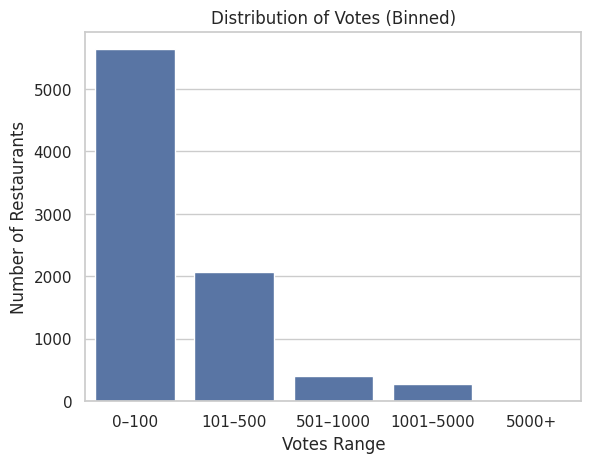

In [144]:
#Votes - Customer engagement
sns.countplot(x='Votes_bin', data=new_df)
plt.title('Distribution of Votes (Binned)')
plt.xlabel('Votes Range')
plt.ylabel('Number of Restaurants')
plt.show()

In [146]:
#Lets get the percentages
(new_df['Votes_bin'].value_counts(normalize=True) * 100)

,proportion
Votes_bin,
0–100,67.075348
101–500,24.723247
501–1000,4.773241
1001–5000,3.285323
5000+,0.142840


Insights:
- 18. 67% of restaurants received 0-100 votes(Less famous)
- 19. Only 0.14% of the restaurants recevied 5000+ votes(more famous)
- 20. 91.7% of restaurants received 0-500 votes(majority of the data is from less famous restaurants)

##3.2 Numerical Analysis

Univariate Numerical Analysis

In [158]:
new_df.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Rating_Bin,Cost_Class,Country,Votes_bin
0,Makati City,"French, Japanese, Desserts",1100.0,Yes,No,No,3.0,4.8,Excellent,314.0,4.6 - 5.0,1001 - 2000,South Africa,101–500
1,Makati City,Japanese,1200.0,Yes,No,No,3.0,4.5,Excellent,591.0,4.1 - 4.5,1001 - 2000,South Africa,501–1000
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000.0,Yes,No,No,4.0,4.4,Very Good,270.0,4.1 - 4.5,2001 - 5000,South Africa,101–500
3,Mandaluyong City,"Japanese, Sushi",1500.0,No,No,No,4.0,4.9,Excellent,365.0,4.6 - 5.0,1001 - 2000,South Africa,101–500
5,Mandaluyong City,Chinese,1000.0,No,No,No,3.0,4.4,Very Good,336.0,4.1 - 4.5,501 - 1000,South Africa,101–500


In [162]:
#There are 4 Numerical Columns.
#1. Histograms/KD Plot - Skewness
#2. Boxplots → detect outliers
#3. Correlation Matrix → check linear relations between numerical features

**1. Histogram**

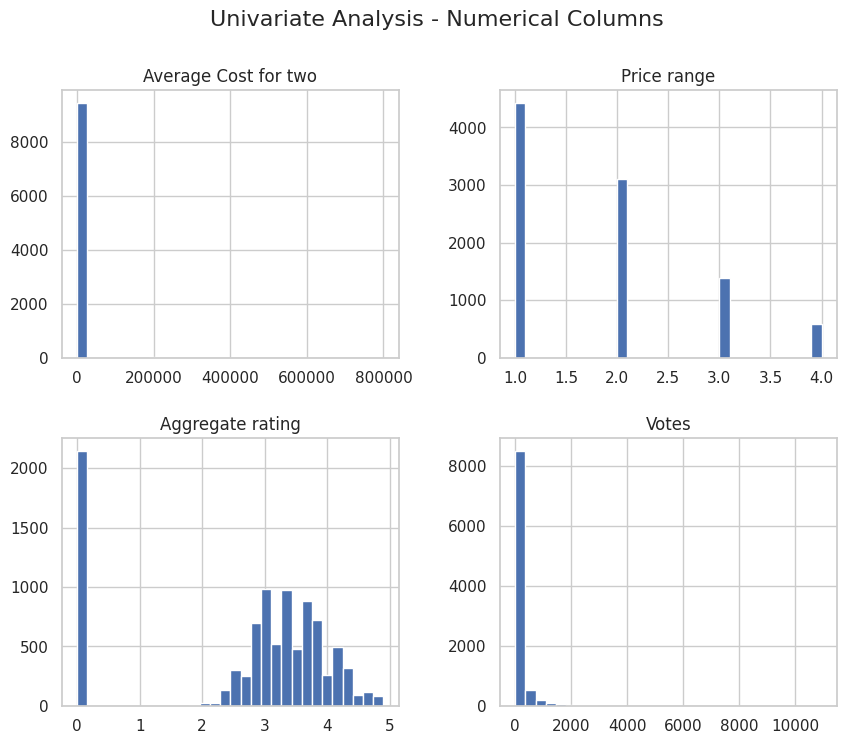

In [160]:
#Identifying Skewness/Spread of X vs Y(Number of Restaurants)
new_df.hist(figsize=(10,8), bins=30)
plt.suptitle('Univariate Analysis - Numerical Columns', fontsize=16)
plt.show()

1. **KD Plot**

/tmp/ipython-input-2191509133.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=new_df[col], shade=True)


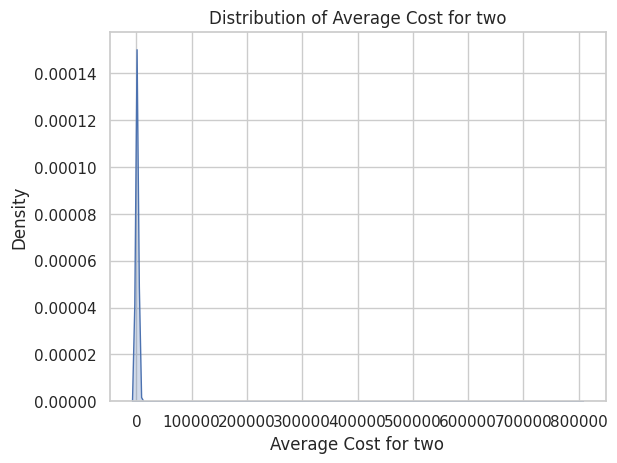

/tmp/ipython-input-2191509133.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=new_df[col], shade=True)


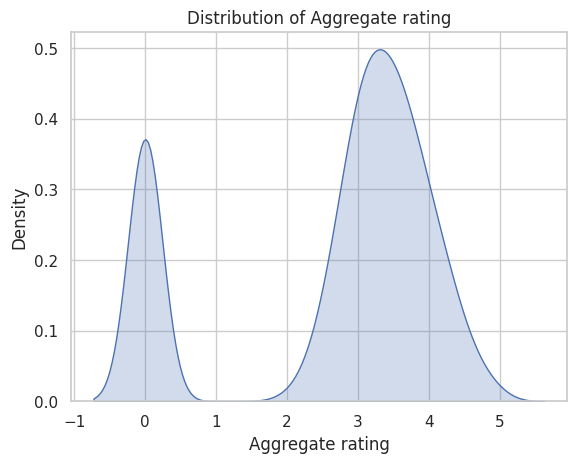

/tmp/ipython-input-2191509133.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=new_df[col], shade=True)


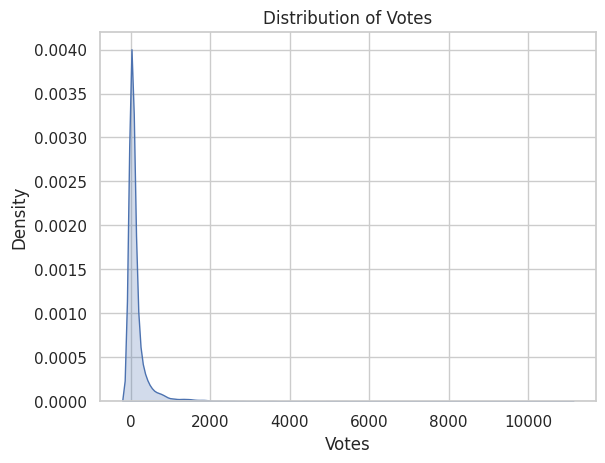

In [163]:
#Identifying Skewness/Spread of X vs Y(Number of Restaurants)
for col in ['Average Cost for two', 'Aggregate rating', 'Votes']:
    sns.kdeplot(x=new_df[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

Insights:
- 21. Average Cost for Two → Extremely right-skewed; most restaurants are low-cost, few are extremely expensive (possible outliers).

- 22. Price Range → Majority fall in low to mid-price levels (1–2), few in higher categories.

- 23. Aggregate Rating → Most ratings cluster between 3 and 4; very few low-rated restaurants.

- 24. Votes → Highly right-skewed; most restaurants have very few votes, indicating few popular ones dominate engagement.

**2. Boxplots**

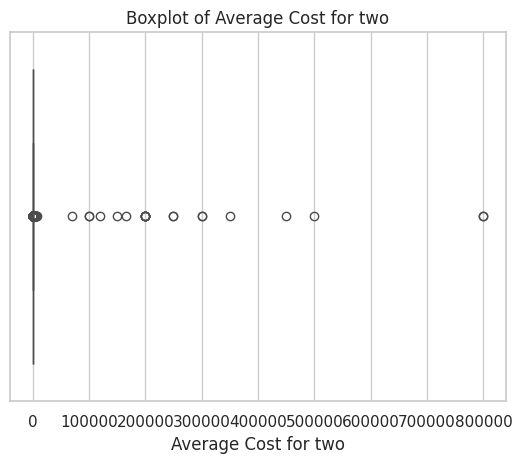

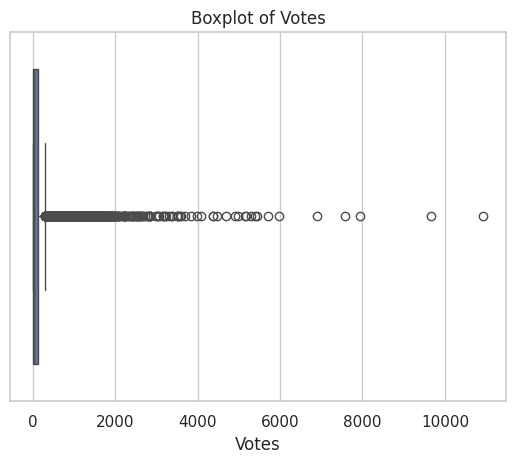

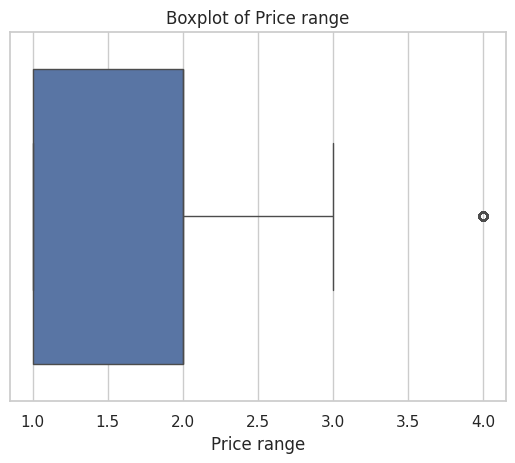

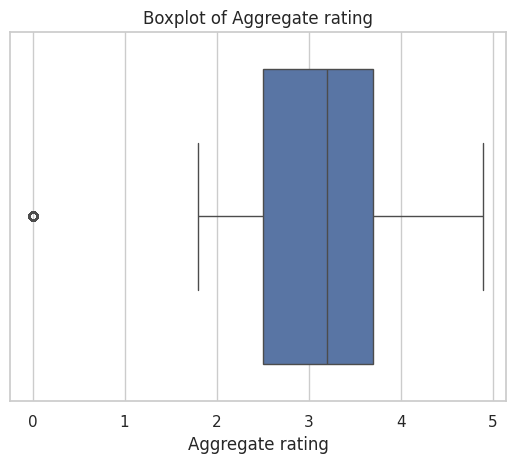

In [167]:
#Analysing Outliers
for col in ['Average Cost for two', 'Votes', 'Price range', 'Aggregate rating']:
    sns.boxplot(x=new_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Insights:
- 25. Too many outliers in Votes and Average Cost for two, showing its heavily skewness again.
- 26. Price Range and Aggregate Rating do not have a lot of outliers.

**3. Corrleation Matrix**

There are Binary Columns(YES/NO) in categorical format. Lets convert

In [169]:
#USING DUMMY ENCODING
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,Average Cost for two,Price range,Aggregate rating,Votes,City_Abu Dhabi,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,City_Amritsar,...,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States,Votes_bin_0–100,Votes_bin_101–500,Votes_bin_501–1000,Votes_bin_1001–5000,Votes_bin_5000+
0,1100.0,3.0,4.8,314.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1200.0,3.0,4.5,591.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,4000.0,4.0,4.4,270.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1500.0,4.0,4.9,365.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,1000.0,3.0,4.4,336.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


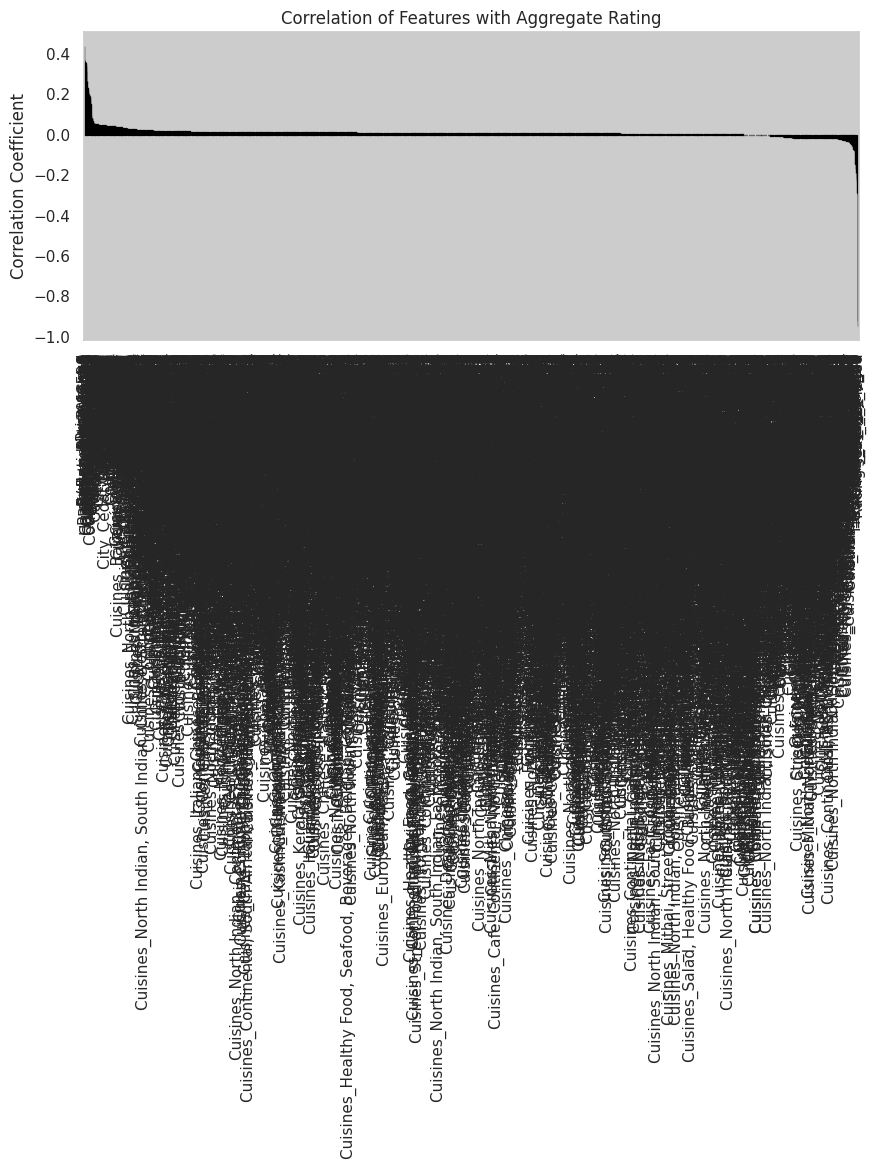

In [173]:
#Correlation Matrix Bar Chart between (All X) vs Y
corr = new_df_dummies.corr()['Aggregate rating'].drop('Aggregate rating').sort_values(ascending=False)
plt.figure(figsize=(10,4))
corr.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Correlation of Features with Aggregate Rating')
plt.ylabel('Correlation Coefficient')
plt.show()

In [174]:
#Correlation Chart is not useful because of too many values, so we will do it for numeric columns only

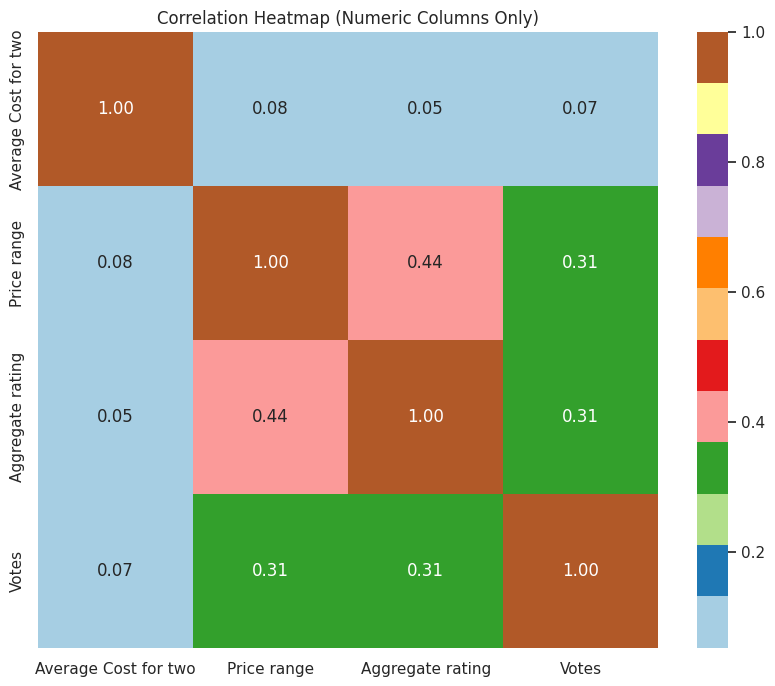

In [182]:
#Correlation Heatmap between Numerical
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.select_dtypes(include=['int64', 'float64']).corr(), cmap='Paired', annot=True, fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

Insight:
- 27. Aggregate Rating and Price Range are directly proportional


##4. Bivariate Analysis

Numerical vs Numerical


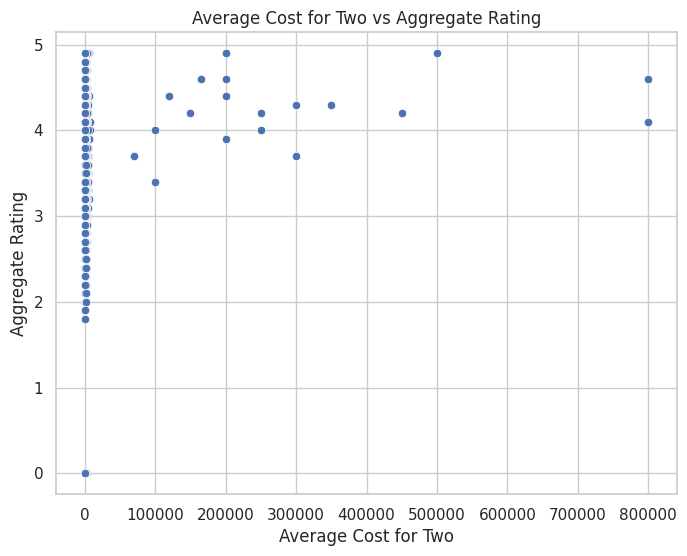

In [194]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title('Average Cost for Two vs Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()

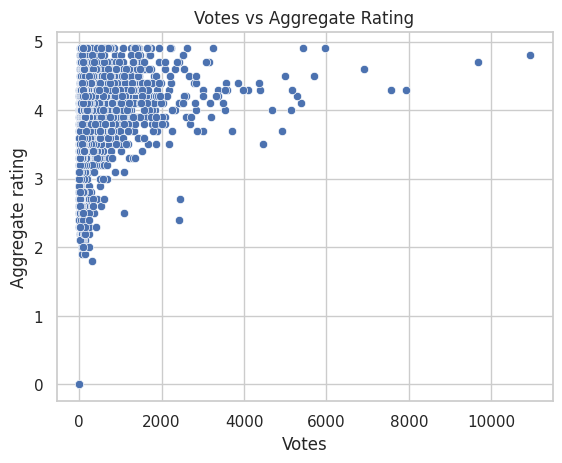

In [192]:
#Votes vs Aggregate Rating
sns.scatterplot(x='Votes', y='Aggregate rating', data=new_df)
plt.title('Votes vs Aggregate Rating')
plt.show()

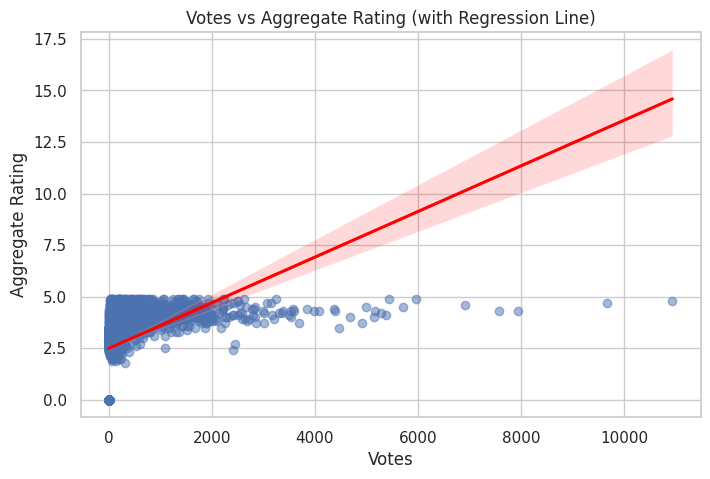

In [217]:
plt.figure(figsize=(8,5))
sns.regplot(x='Votes', y='Aggregate rating', data=new_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Votes vs Aggregate Rating (with Regression Line)')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

Insights:
- X. Votes and Aggregate Rating is directly proportional, as seen by the regression line(scatter plot)

Categorical vs Numerical

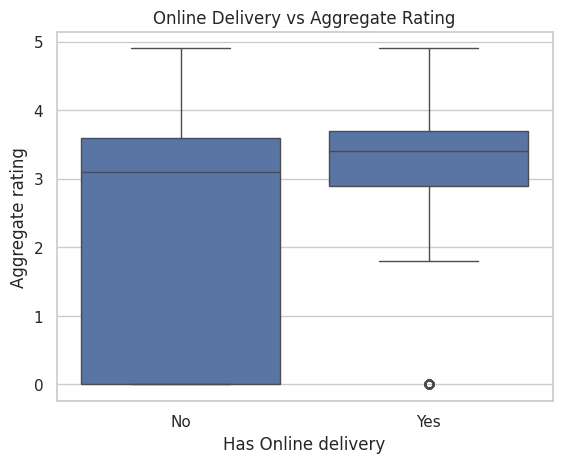

In [190]:
#Online Delivery vs Aggregate Rating(Y)
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=new_df)
plt.title('Online Delivery vs Aggregate Rating')
plt.show()

Insights:
- 28. Online Delivery leads to constant and moderate rating(3-4)
- 29. No online delivery may cause less rating points.

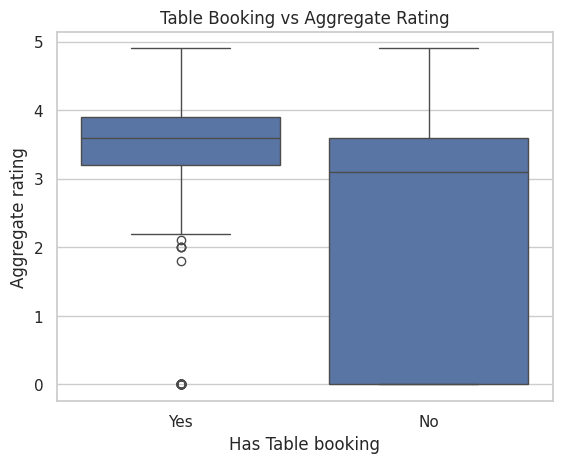

In [196]:
#Table Booking vs Aggregate Rating(Y)
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=new_df)
plt.title('Table Booking vs Aggregate Rating')
plt.show()

Insights:
- 30. Table booking shows consistent moderate to high ratings
- 31. No Table Booking feature shows low to moderate rating points and is inconsistent.

Categorical vs Categorical

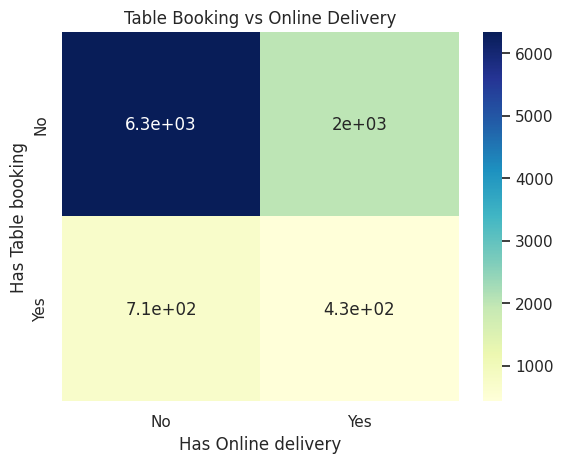

In [249]:
#Visualzation of Online Delivery vs Table Booking
sns.heatmap(pd.crosstab(new_df['Has Table booking'], new_df['Has Online delivery']),
            annot=True, cmap='YlGnBu')
plt.title('Table Booking vs Online Delivery')
plt.show()


In [197]:
#Analysis of Online Delivery vs Table Booking
pd.crosstab(new_df['Has Table booking'], new_df['Has Online delivery'])

Has Online delivery,No,Yes
Has Table booking,,
No,6344,2007
Yes,710,432


In [199]:
#In Percentage
pd.crosstab(new_df['Has Table booking'],new_df['Has Online delivery'],normalize='index') * 100

Has Online delivery,No,Yes
Has Table booking,,
No,75.966950,24.033050
Yes,62.171629,37.828371


Insights:
- 32. Majority of restaurants have no online delivery, table booking(75%).
- 33. 24% of the restaurants have online delivery but no table booking.

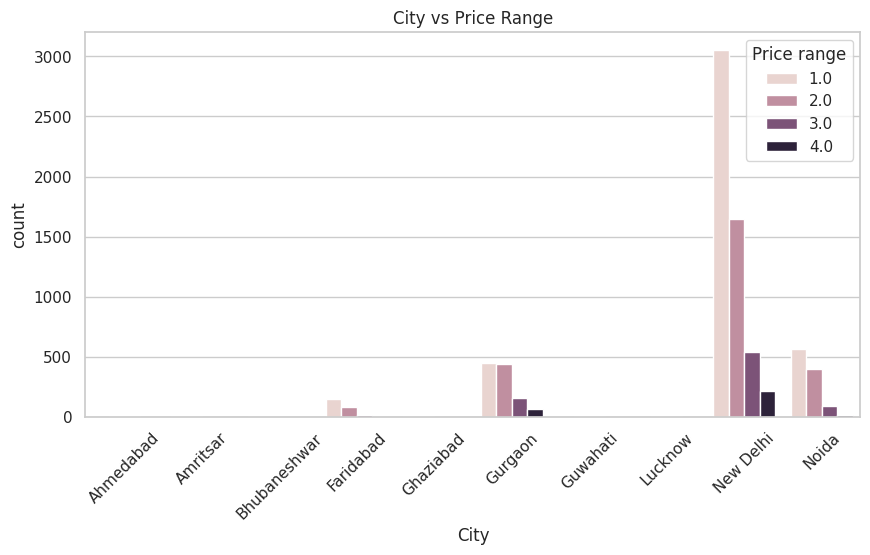

In [243]:
#Visualzation of City vs Price Range
# Top 10 cities
top_cities = new_df['City'].value_counts().head(10).index
top_city_df = new_df[new_df['City'].isin(top_cities)]

#City vs Price Range
plt.figure(figsize=(10,5))
sns.countplot(data=top_city_df, x='City', hue='Price range')
plt.title('City vs Price Range')
plt.xticks(rotation=45)
plt.show()


In [244]:
#Analysis of City vs Price Range
#Create a cross tab
pd.crosstab(top_city_df['City'], top_city_df['Price range'])

Price range,1.0,2.0,3.0,4.0
City,,,,
Ahmedabad,1,8,11,1
Amritsar,7,11,3,0
Bhubaneshwar,6,12,3,0
Faridabad,151,86,14,0
Ghaziabad,9,13,2,1
Gurgaon,453,438,155,67
Guwahati,1,10,8,2
Lucknow,2,7,10,2
New Delhi,3049,1648,539,215


In [245]:
#In Percentage
pd.crosstab(top_city_df['City'], top_city_df['Price range'],normalize='index') * 100

Price range,1.0,2.0,3.0,4.0
City,,,,
Ahmedabad,4.761905,38.095238,52.380952,4.761905
Amritsar,33.333333,52.380952,14.285714,0.000000
Bhubaneshwar,28.571429,57.142857,14.285714,0.000000
Faridabad,60.159363,34.262948,5.577689,0.000000
Ghaziabad,36.000000,52.000000,8.000000,4.000000
Gurgaon,40.700809,39.353100,13.926325,6.019766
Guwahati,4.761905,47.619048,38.095238,9.523810
Lucknow,9.523810,33.333333,47.619048,9.523810
New Delhi,55.934691,30.232985,9.888094,3.944230


Insights:
- 34. 1-2 Price Range: Majority rests in Amritsar, Bhubhaneshwar, Faridabad, Ghaziabad, Gurgaon, New Delhi, Noids
- 35. 2-3 Price RangeL Majority rests in Ahmedabad, Guwahati.
- 37. Very few of the top 10 restaurants lie in the 4.0 price range. Maximum lie in 2.0 range.

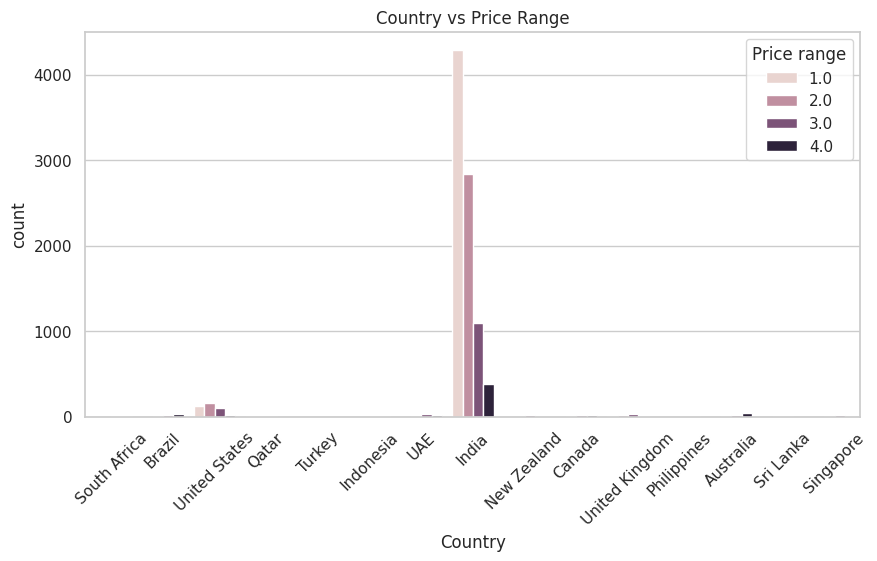

In [247]:
#Visualzation of Country vs Price Range
plt.figure(figsize=(10,5))
sns.countplot(data=new_df, x='Country', hue='Price range')
plt.title('Country vs Price Range')
plt.xticks(rotation=45)
plt.show()

In [212]:
#Percentage analysis of Countries
pd.crosstab(new_df['Country'], new_df['Price range'],normalize='index') * 100

Price range,1.0,2.0,3.0,4.0
Country,,,,
Australia,0.000000,6.666667,28.333333,65.000000
Brazil,3.389831,11.864407,25.423729,59.322034
Canada,7.500000,10.000000,42.500000,40.000000
India,49.773756,33.008470,12.727695,4.490080
Indonesia,0.000000,5.000000,25.000000,70.000000
New Zealand,0.000000,4.761905,95.238095,0.000000
Philippines,0.000000,5.000000,25.000000,70.000000
Qatar,16.666667,58.333333,20.833333,4.166667
Singapore,0.000000,34.482759,51.724138,13.793103


Insights:
- 38. 50% of the rests in India lie in 1.0 Price Range
- 39. 80% of Indian lie in 1.0-2.0 Price Range

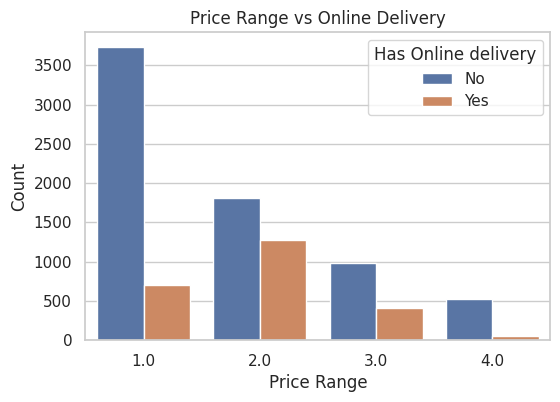

In [219]:
#Visualzation of Price Range vs Online Delivery
plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x='Price range', hue='Has Online delivery')
plt.title('Price Range vs Online Delivery')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Insights:
- 40. Majority of restaurants that have no onlie delivery have a price range of 1.0 and %age decreases as price range goes up.
- 41. Majority of restaurants that have online delivery lie in 2.0 price range and are distributed in the price range


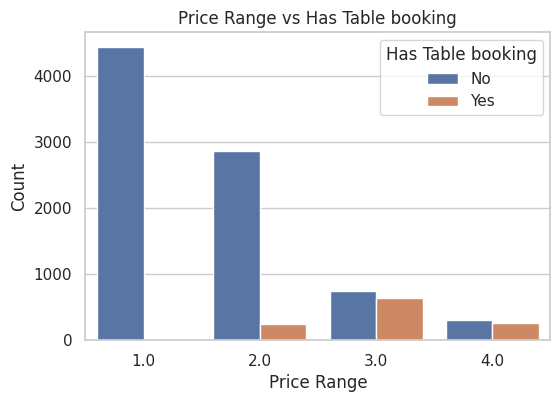

In [220]:
#Visualzation of Price Range vs Has Table booking
plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x='Price range', hue='Has Table booking')
plt.title('Price Range vs Has Table booking')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Insights:
- 42. Majority of restaurants with no table booking feature have a low price range
- 43. Majority restaurants with table booking feature have moderate to high price range.

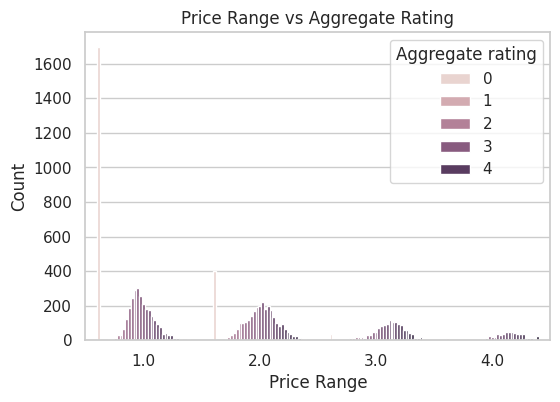

In [250]:
#Visualzation of Price Range vs Online Delivery
plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x='Price range', hue='Aggregate rating')
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

Insights:
- 44. The majority of restaurants fall in price range 1 and 2, indicating lower-cost dining dominates.

#**Conclusion**

🎯 Target Variable

The key outcome is Aggregate Rating — used to measure restaurant performance and customer satisfaction.

🍽️ Data Quality & Structure

Several columns (like Locality, Restaurant ID, Longitude, Latitude, Currency, Country Code, RatingColor) provide little predictive value and can be dropped.

Missing values are minimal overall (<1%), so data cleaning effort is small.

Numerical variables: Average Cost for Two, Votes, Aggregate Rating.

Categorical variables: City, Cuisines, Currency.

🌍 Geographic & Cuisine Insights

India dominates the dataset with ~90% of restaurants, followed by the US (4.47%), while Turkey has the least.

Within India, New Delhi has the highest number of restaurants, followed by Gurgaon, Noida, Faridabad, and Ghaziabad.

Top cuisines: North Indian, Chinese, Fast Food, Mughlai, Café, Bakery, Desserts, and Street Food.

North Indian and Chinese dominate, while Street Food, Bakery, and Café are less frequent among the top 10.

💸 Cost & Price Insights

Average Cost for Two → extremely right-skewed (most restaurants are affordable; few are very costly).

Price Range → most restaurants lie in low to mid price bands (1–2).

80% of Indian restaurants are in price range 1–2, confirming India’s price-sensitive market.

Restaurants with table booking or online delivery generally fall into higher price ranges.

⭐ Ratings & Popularity

Majority of restaurants are rated between 2.6–3.5 (≈43%); only ~2% are in the 4.6–5.0 range.

Votes distribution is heavily right-skewed:

91.7% of restaurants have ≤500 votes → few are truly popular.

Only 0.14% exceed 5000 votes → these are standout establishments.

Votes and Aggregate Rating show a direct positive correlation — more votes usually mean higher ratings.

Price Range and Aggregate Rating also correlate positively — higher-priced restaurants tend to earn better ratings.

📱 Feature-Based Insights

Online Delivery:

Most restaurants don’t offer online delivery (~75%).

Those with online delivery generally have steady moderate ratings (3–4).

Restaurants without it tend to have slightly lower and more variable ratings.

Table Booking:

Most restaurants don’t offer table booking (~75%).

Those that do tend to have higher and more consistent ratings (3.5–4.5).

Table booking is more common among higher-priced restaurants.

💬 Key Takeaways

Indian restaurants dominate the dataset, mainly concentrated in NCR (New Delhi & surrounding cities).

Affordable dining (Price Range 1–2) is the norm — reflecting the mass-market customer base.

Better facilities (table booking, online delivery) are linked with higher price ranges and better ratings.

Restaurant popularity (votes) is highly unequal — a small number of venues attract most engagement.

Improving online presence and table-booking access could raise visibility and average ratings.

High-end restaurants show higher ratings but form a small minority of the market.